# ARUCO markers: basics

## 1:  Marker creation

In [3]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

<IPython.core.display.Javascript object>


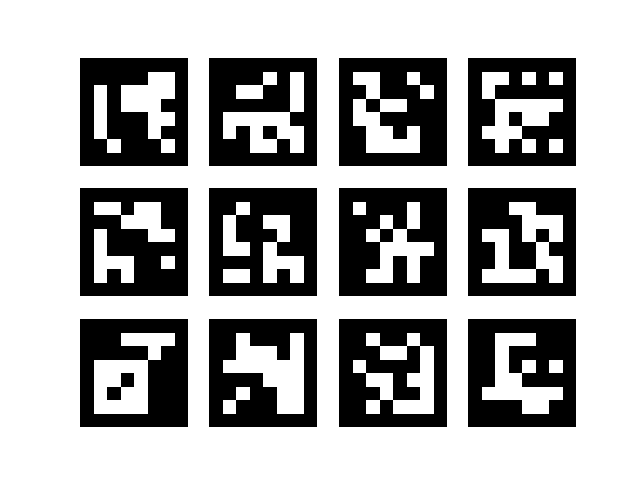

In [4]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("_data/markers.pdf")    
plt.show()

## 2: Print, cut, stick and take a picture

<IPython.core.display.Javascript object>


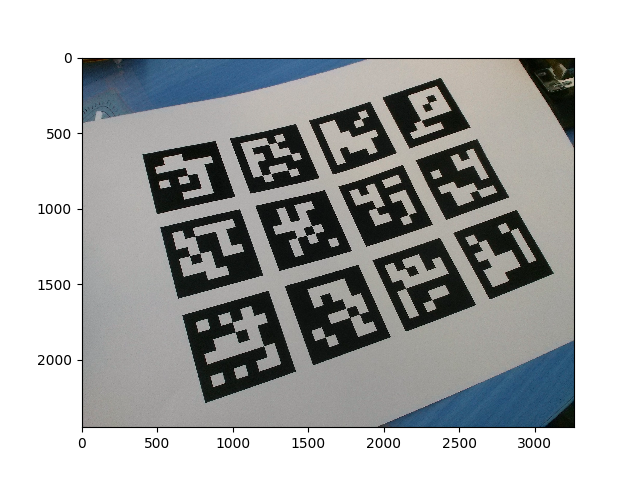

In [5]:
frame = cv2.imread("_data/aruco_photo.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

## 3: Post processing

In [6]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)


CPU times: user 420 ms, sys: 20 ms, total: 440 ms
Wall time: 172 ms


Pretty fast processing !

## 4: Results

<IPython.core.display.Javascript object>


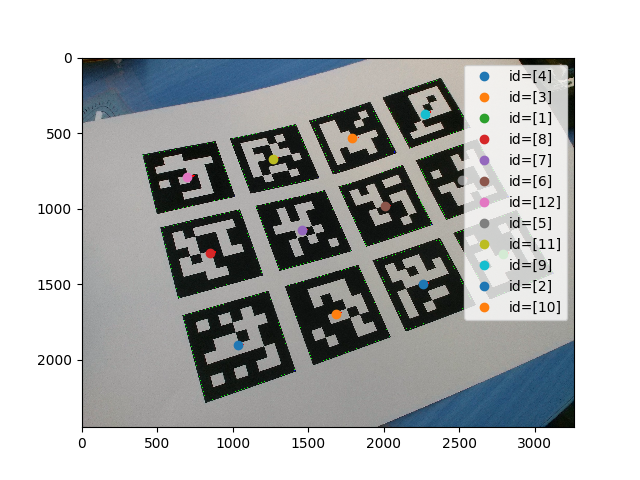

In [7]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [8]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1      c2      c3      c4      m1      m2      m3      m4  \
marker                                                                     
1      x  3114.0  2701.0  2467.0  2876.0  2907.5  2584.0  2671.5  2995.0   
       y  1429.0  1597.0  1168.0  1019.0  1513.0  1382.5  1093.5  1224.0   
2      x  2593.0  2152.0  1939.0  2363.0  2372.5  2045.5  2151.0  2478.0   
       y  1635.0  1804.0  1352.0  1209.0  1719.5  1578.0  1280.5  1422.0   
3      x  2037.0  1533.0  1350.0  1826.0  1785.0  1441.5  1588.0  1931.5   
       y  1848.0  2032.0  1518.0  1381.0  1940.0  1775.0  1449.5  1614.5   
4      x  1409.0   822.0   670.0  1231.0  1115.5   746.0   950.5  1320.0   
       y  2076.0  2281.0  1712.0  1553.0  2178.5  1996.5  1632.5  1814.5   
5      x  2820.0  2415.0  2217.0  2614.0  2617.5  2316.0  2415.5  2717.0   
       y   924.0  1071.0   686.0   550.0   997.5   878.5   618.0   737.0   
6      x  2316.0  1883.0  1705.0  2121.0  2099.5  1794.0  1913.0  2218.5   
       y  1105.0  1248.0   860.0   720.0  1176.5  1054.0   790.0   912.5   
7      x  1779.0  1311.0  1154.0  1603.0  1545.0  1232.5  1378.5  1691.0   
       y  1279.0  1409.0   989.0   886.0  1344.0  1199.0   937.5  1082.5   
8      x  1193.0   640.0   525.0  1039.0   916.5   582.5   782.0  1116.0   
       y  1439.0  1592.0  1133.0  1013.0  1515.5  1362.5  1073.0  1226.0   
9      x  2561.0  2173.0  1998.0  2374.0  2367.0  2085.5  2186.0  2467.5   
       y   464.0   598.0   272.0   146.0   531.0   435.0   209.0   305.0   
10     x  2068.0  1667.0  1519.0  1902.0  1867.5  1593.0  1710.5  1985.0   
       y   628.0   762.0   428.0   309.0   695.0   595.0   368.5   468.5   
11     x  1563.0  1119.0   987.0  1411.0  1341.0  1053.0  1199.0  1487.0   
       y   797.0   896.0   543.0   449.0   846.5   719.5   496.0   623.0   
12     x  1008.0   501.0   407.0   881.0   754.5   454.0   644.0   944.5   
       y   920.0  1033.0   651.0   563.0   976.5   842.0   607.0   741.5   

                o  
marker             
1      x  2789.50  
       y  1303.25  
2      x  2261.75  
       y  1500.00  
3      x  1686.50  
       y  1694.75  
4      x  1033.00  
       y  1905.50  
5      x  2516.50  
       y   807.75  
6      x  2006.25  
       y   983.25  
7      x  1461.75  
       y  1140.75  
8      x   849.25  
       y  1294.25  
9      x  2276.50  
       y   370.00  
10     x  1789.00  
       y   531.75  
11     x  1270.00  
       y   671.25  
12     x   699.25  
       y   791.75